In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


Evaluation Metrics:
Accuracy: 0.42

Confusion Matrix: {conf_matrix}
[[ 7 14]
 [ 9 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        21
           1       0.42      0.53      0.47        19

    accuracy                           0.42        40
   macro avg       0.43      0.43      0.42        40
weighted avg       0.43      0.42      0.42        40



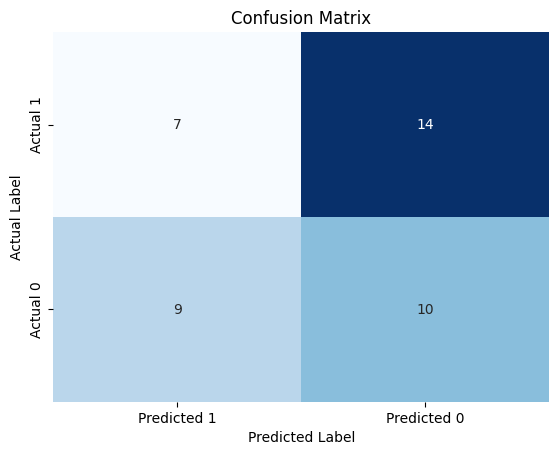

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

df = pd.read_excel('ML_AAPL.xlsx')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2', 'Feature3']], df['Target (Y)'], test_size=0.4, random_state=42)

# Build a simple Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
predictions = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Display evaluation metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix: {conf_matrix}")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Visualize the confusion matrix using seaborn
# Recall = TP/(TP+FN) 0.33
# Precision = TP/(TP+FP) 0.44
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 1', 'Predicted 0'],
            yticklabels=['Actual 1', 'Actual 0'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()